In [398]:
pip install selenium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [399]:
from bs4 import BeautifulSoup
import re
import pandas as pd

#from os import listdir
#from os.path import isfile, join
import urllib


In [400]:
from selenium import webdriver


# Set up options for headless browsing
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'
options = webdriver.ChromeOptions()
options.add_argument(f'user-agent={user_agent}')
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--disable-user-media-security=true")
options.add_argument("--disable-notifications")
options.add_argument("--disable-popup-blocking")
options.add_argument("--disable-web-security")
options.add_argument("--disable-features=IsolateOrigins,site-per-process")
options.add_argument("--start-maximized")

# Set up the Chrome driver
driver = webdriver.Chrome(options=options)

# Navigate to the page and get the page source
url = "https://www.amazon.com/s?k=laptops"
driver.get(url)
page_source = driver.page_source

# Parse the page source with BeautifulSoup
soup = BeautifulSoup(page_source, 'html.parser')
items = soup.find_all("div", {"data-component-type":"s-search-result"})
# items = soup.find_all("div", {"data-asin":True})

print(len(items))

# Close the browser
driver.quit()


22


In [401]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.expected_conditions import visibility_of_element_located

def fetch_page_data_amazon(url):
    user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'
    options = webdriver.ChromeOptions()
    options.add_argument(f'user-agent={user_agent}')
    options.add_argument("--disable-blink-features=AutomationControlled")
    options.add_argument("--disable-user-media-security=true")
    options.add_argument("--disable-notifications")
    options.add_argument("--disable-popup-blocking")
    options.add_argument("--disable-web-security")
    options.add_argument("--disable-features=IsolateOrigins,site-per-process")
    options.add_argument("--start-maximized")
    
    browser = webdriver.Chrome(options=options)
    browser.get(url)
    browser.execute_script("window.scrollTo(0, 5000)")
    request = (
        WebDriverWait(driver=browser, timeout=10)
        .until(visibility_of_element_located((By.CSS_SELECTOR, "div")))
        .text
    )
    file_data = browser.page_source
    browser.close()
        
    soup = BeautifulSoup(file_data, 'html.parser')
    items = soup.find_all("div", {"data-component-type":"s-search-result"})
#     items = soup.find_all("div", {"data-asin":True})

    return items





In [402]:
urls = ["https://www.amazon.com/s?k=laptops"]
for i in range(2,21):
     urls.append("https://www.amazon.com/s?k=laptops&page=" + str(i))

In [403]:
all_items = []
for url in urls:
    print(url)
    items = fetch_page_data_amazon(url)
    print(len(items))
    all_items.extend(items)


https://www.amazon.com/s?k=laptops
22
https://www.amazon.com/s?k=laptops&page=2
22
https://www.amazon.com/s?k=laptops&page=3
22
https://www.amazon.com/s?k=laptops&page=4
22
https://www.amazon.com/s?k=laptops&page=5
22
https://www.amazon.com/s?k=laptops&page=6
22
https://www.amazon.com/s?k=laptops&page=7
22
https://www.amazon.com/s?k=laptops&page=8
22
https://www.amazon.com/s?k=laptops&page=9
22
https://www.amazon.com/s?k=laptops&page=10
22
https://www.amazon.com/s?k=laptops&page=11
22
https://www.amazon.com/s?k=laptops&page=12
22
https://www.amazon.com/s?k=laptops&page=13
22
https://www.amazon.com/s?k=laptops&page=14
22
https://www.amazon.com/s?k=laptops&page=15
22
https://www.amazon.com/s?k=laptops&page=16
22
https://www.amazon.com/s?k=laptops&page=17
22
https://www.amazon.com/s?k=laptops&page=18
22
https://www.amazon.com/s?k=laptops&page=19
22
https://www.amazon.com/s?k=laptops&page=20
8


In [404]:
all_items

[<div class="sg-col-20-of-24 s-result-item s-asin sg-col-0-of-12 sg-col-16-of-20 AdHolder sg-col s-widget-spacing-small sg-col-12-of-16" data-asin="B0BVG5GWN8" data-cel-widget="search_result_2" data-component-id="4" data-component-type="s-search-result" data-index="3" data-uuid="438e9611-ee5b-4328-a177-fbea450dabe9"><div class="sg-col-inner"><div cel_widget_id="MAIN-SEARCH_RESULTS-3" class="s-widget-container s-spacing-small s-widget-container-height-small celwidget slot=MAIN template=SEARCH_RESULTS widgetId=search-results_1" data-cel-widget="MAIN-SEARCH_RESULTS-3" data-csa-c-id="tppop4-qr3s7e-xlszqc-kgd3tt" data-csa-c-item-id="amzn1.asin.1.B0BVG5GWN8" data-csa-c-pos="1" data-csa-c-type="item" data-csa-op-log-render="">
 <div class="rush-component" data-component-id="5" data-component-props='{"percentageShownToFire":"50","batchable":true,"requiredElementSelector":".s-image:visible","url":"https://unagi-na.amazon.com/1/events/com.amazon.eel.SponsoredProductsEventTracking.prod?qualifier=

In [405]:
# Create an empty list to store extracted product data
product_list=[]

# Loop through each item on the page
for item in all_items:
    
    # Find and extract product description
    product_description = item.find("span", {"class":"a-size-medium a-color-base a-text-normal"}).text
#     print (product_detail)
    
    # Find and extract rating score
    rating_score_span = item.find("span", {"class":"a-icon-alt"})
    if rating_score_span is None:
        rating_score = None
    else:
        rating_score = rating_score_span.text.replace("out of 5 stars", "")
#     print (rating_score)

    # Find and extract number of global ratings
    number_of_global_rating_span = item.find("span",{"class":"a-size-base s-underline-text"})
    if number_of_global_rating_span is None:
        number_of_global_rating = None
    else:
        number_of_global_rating = number_of_global_rating_span.text.replace(",", "")
#     print (number_of_global_rating)

    #  Find and extract current price
    price_span = item.find("span",{"class":"a-offscreen"})
    if price_span is None:
        current_price = None
    else:
        current_price = price_span.text.replace(",", "").replace("$", "")
#     print (current_price)

    # Find and extract original price
    original_price_span = item.find("span", {"class": "a-price a-text-price"})
    if original_price_span is None:
        original_price = None
    else:
        original_price = original_price_span.text.replace(",", "").replace("$", "")
            # Remove the duplicated part of the price
        original_price = original_price[:len(original_price)//2]
#     print(original_price)

    
    # Find and extract display size
    display_size_span = item.find_all("div", {"class": "sg-col sg-col-0-of-12 sg-col-4-of-16 sg-col-2-of-20 sg-col-2-of-24 puis-padding-right-small"})
    if not display_size_span:
        display_size = None
    else:
        display_size_span = display_size_span[0]
        display_size = display_size_span.find("span", {"class": "a-text-bold"})
        if display_size:
            display_size = display_size.text
        else:
            display_size = None
#     print(display_size)
    
    # Find and extract disk size
    disk_size_spans = item.find_all("div", {"class": "sg-col sg-col-0-of-12 sg-col-4-of-16 sg-col-2-of-20 sg-col-2-of-24 puis-padding-right-small"})
    if not disk_size_spans:
        disk_size = None
    else:
        disk_size_span = disk_size_spans[1]
        disk_size = disk_size_span.find("span", {"class": "a-text-bold"})
        if disk_size:
            disk_size = disk_size.text
        else:
            disk_size = None
#     print(disk_size)
    
    # Find and extract RAM
    ram_spans = item.find_all("div", {"class": "sg-col sg-col-0-of-12 sg-col-4-of-16 sg-col-2-of-20 sg-col-2-of-24 puis-padding-right-small"})
    if not ram_spans:
        ram = None
    else:
        ram_spans = ram_spans[2]
        ram = ram_spans.find("span", {"class": "a-text-bold"})
        if ram:
            ram = ram.text
        else:
            ram = None
#     print(ram)
    
    # Find and extract operating system
    operating_system_spans = item.find_all("div", {"class": "sg-col sg-col-0-of-12 sg-col-4-of-16 sg-col-2-of-20 sg-col-2-of-24 puis-padding-right-small"})
    if not operating_system_spans:
        operating_system = None
    else:
        operating_system_spans = operating_system_spans[3]
        operating_system = operating_system_spans.find("span", {"class": "a-text-bold"})
        if operating_system:
            operating_system = operating_system.text
        else:
            operating_system = None
#     print(operating_system)


    payload=[product_description, rating_score,  number_of_global_rating, current_price,original_price, display_size, disk_size, ram, operating_system]
    product_list.append(payload)


In [406]:
amazon_laptop_df=pd.DataFrame(product_list,columns=["product_description","rating_score","number_of_global_rating","current_price","original_price","display_size","disk_size","ram","operating_system"])

In [407]:
amazon_laptop_df

product_description rating_score  \
0    Lenovo Ideapad 1i 14 Laptop, 14" HD Screen, In...         3.7    
1    Lenovo IdeaPad 15.6" Laptop Newest, 20GB RAM, ...         4.3    
2    HP 2022 Stream 14" HD Laptop, Intel Celeron N4...         4.2    
3    ASUS 15 Slim Chrome OS Laptop Intel Processor ...         4.3    
4    Gateway Newest Touchscreen 11.6 HD 2-in-1 Conv...         3.9    
..                                                 ...          ...   
421  Lenovo IdeaPad 3 14" FHD Laptop, 11th Gen Inte...         3.0    
422  BiTECOOL 14-inch Windows 11 Laptop, 12GB RAM, ...         4.4    
423  Contour Design RollerMouse Red Wireless - Wire...         4.5    
424  Dell Latitude 7390 13.3" FHD Touchscreen Lapto...         4.1    
425  BiTECOOL Windows 11 Laptop, 15.6 inches Full H...         3.7    

    number_of_global_rating current_price original_price display_size  \
0                        19        229.00           None    14 inches   
1                       210        399.00           None  15.6 inches   
2                       124        289.00           None    14 inches   
3                        23        139.99           None  15.6 inches   
4                       673        134.77         169.99  11.6 inches   
..                      ...           ...            ...          ...   
421                       3        721.64         899.00    14 inches   
422                      92        299.00         319.00    14 inches   
423                     492        349.00           None         None   
424                      14        269.96           None  13.3 inches   
425                      11        319.00         339.00  15.6 inches   

    disk_size      ram operating_system  
0      128 GB     4 GB  Windows 11 Home  
1        1 TB  20.0 GB     Windows 11 S  
2       64 GB     4 GB     Windows 11 S  
3       32 GB        -        Chrome OS  
4       64 GB     4 GB     Windows 10 S  
..        ...      ...              ...  
421      1 TB  32.0 GB       Windows 11  
422    256 GB  12.0 GB   Windows 11 Pro  
423      None     None             None  
424    256 GB        -   Windows 10 Pro  
425    256 GB  12.0 GB       Windows 11  

[426 rows x 9 columns]

In [408]:
import pandas as pd
amazon_laptop_df.to_csv("amazon_laptop_data.csv", index=False)

In [90]:
import pandas as pd
url="https://raw.githubusercontent.com/NickQin001/data-bootcamp/main/amazon_laptop_data.csv"
amazon_laptop_df = pd.read_csv(url)

In [91]:
amazon_laptop_df

product_description  rating_score  \
0    HP Newest 14 FHD Laptop for Business and Stude...           4.3   
1    HP 2022 New 15 Laptop, 15.6" HD LED Display, I...           4.3   
2    Gateway Newest Touchscreen 11.6 HD 2-in-1 Conv...           3.9   
3    ASUS 15 Slim Chrome OS Laptop Intel Processor ...           4.4   
4    SGIN Laptop 15.6 Inch 4GB DDR4 128GB SSD, Wind...           4.5   
..                                                 ...           ...   
421  HP 2023 Newest Pavilion 15.6" HD Laptop,Intel ...           5.0   
422  BiTECOOL 14-inch Windows 11 Laptop, 12GB RAM, ...           4.4   
423  Lenovo ThinkPad L380 Yoga 2-in-1 Laptop, 13.3"...           3.3   
424  300W 20V 15A ADL300SDC3A Laptop Charger Fit fo...           NaN   
425  Lenovo 15.6" IdeaPad 1 Laptop, 20GB Memory, 1T...           4.3   

     number_of_global_rating current_price  original_price display_size  \
0                      805.0        449.00             NaN    14 inches   
1                      598.0        479.00             NaN  15.6 inches   
2                      666.0        134.85          169.99  11.6 inches   
3                       22.0        134.99             NaN  15.6 inches   
4                     1125.0        259.99         1049.99  15.6 inches   
..                       ...           ...             ...          ...   
421                      1.0        379.00             NaN  15.6 inches   
422                     92.0        299.00          319.00    14 inches   
423                      9.0        285.90          299.50  13.3 inches   
424                      NaN         78.88             NaN          NaN   
425                     69.0        394.87             NaN  15.6 inches   

    disk_size      ram operating_system  
0      512 GB    16 GB     Windows 11 S  
1        1 TB    16 GB  Windows 11 Home  
2       64 GB     4 GB     Windows 10 S  
3       32 GB        -        Chrome OS  
4      128 GB        -  Windows 11 Home  
..        ...      ...              ...  
421    256 GB     8 GB  Windows 11 Home  
422    256 GB  12.0 GB   Windows 11 Pro  
423         -        -   Windows 10 Pro  
424       NaN      NaN              NaN  
425      1 TB    20 GB       Windows 11  

[426 rows x 9 columns]

In [92]:
'''
Data cleansing
'''
# Drop data that is not about laptops
amazon_laptop_df.drop(amazon_laptop_df[amazon_laptop_df["product_description"].str.contains("Docking|Adapter")].index, inplace=True)

In [93]:
# check for duplicates
duplicate_rows = amazon_laptop_df[amazon_laptop_df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are:")
print(duplicate_rows)

Duplicate Rows except first occurrence based on all columns are:
                                   product_description  rating_score  \
44   Tulasi Laptop Computer, 2023 Laptop, Windows 1...           4.0   
46   Dell Newest Inspiron 3000 i3511 Laptop - 15.6"...           NaN   
50   Lenovo Laptop 17inch Screen| Ryzen5 5625U| Win...           4.5   
53   HP 2023 17" FHD IPS Laptop, Windows 11, Intel ...           NaN   
54   HP Newest Flagship 15.6 HD Touchscreen IPS Lap...           4.3   
..                                                 ...           ...   
420  Premium Dell Latitude E7440 Ultrabook 14 Inch ...           4.1   
421  HP 2023 Newest Pavilion 15.6" HD Laptop,Intel ...           5.0   
422  BiTECOOL 14-inch Windows 11 Laptop, 12GB RAM, ...           4.4   
423  Lenovo ThinkPad L380 Yoga 2-in-1 Laptop, 13.3"...           3.3   
425  Lenovo 15.6" IdeaPad 1 Laptop, 20GB Memory, 1T...           4.3   

     number_of_global_rating current_price  original_price display_siz

In [94]:
amazon_laptop_df.drop_duplicates(inplace=True)

In [95]:
import re

# Define a list of laptop brands
laptop_brands = ["Lenovo", "HP", "ASUS", "Dell", "SAMSUNG", "Microsoft", "MSI", "Acer", "Apple", "Bmax", "GIGABYTE", "Ruzava",
                 "Alienware", "Razer", "Panasonic", "ist computers", "LG", "Toshiba", "Generic", "Oemgenuine","SGIN","Gateway", "Fusion5",
                 "CHUWI", "EXCaliberPC", "Coolby", "jumper", "Computer Upgrade King", "HEWLETT PACKARD","KANGBUKE",
                 "ROKC", "HP Tuners", "ZWYING", "Eluktronics", "AimCare", "BiTECOOL", "Basrdis", "HYUNDAI",
                 "VGKE", "KingnovyPC", "SHOXLAB", "Habisder", "OMMOTECH", "HBESTORE", "Latitude","Intel"]

# Create a new column in the dataframe to store brand information
amazon_laptop_df["brand"] = None

# Iterate through the rows in the dataframe
for index, row in amazon_laptop_df.iterrows():
    # Extract the product description
    description = row["product_description"]
    
    # Iterate through the laptop brands and check if each brand (in lowercase) exists in the description
    for brand in laptop_brands:
        if brand.lower() in description.lower():
            # If the brand is found in the description, assign it to the 'brand' column in the dataframe
            amazon_laptop_df.at[index, "brand"] = brand
            break  # Exit the loop once a brand is found






In [96]:
amazon_laptop_df["brand"].unique()

array(['HP', 'Gateway', 'ASUS', 'SGIN', 'Lenovo', 'Dell', 'jumper',
       'BiTECOOL', 'SAMSUNG', 'Intel', 'MSI', 'Apple', 'Acer', None,
       'Microsoft', 'Ruzava', 'VGKE', 'LG', 'KANGBUKE', 'Bmax', 'Fusion5',
       'Coolby'], dtype=object)

In [97]:
# Identify rows with empty brand value
for description in amazon_laptop_df.loc[amazon_laptop_df["brand"].isnull()]["product_description"]:
    print(description)

Windows 10 Laptop, 13.5" 3K (3000 x 2000) 3:2 IPS Display Celeron N4020 Quad Core, 6GB RAM 128GB SSD, Mini & Light Notebook PC, Webcam, Type C, Office
[Win 11 & MS Office 2019] 15.6’’ High-Speed Celeron N5105 Quad Core Processor Laptop Full HD IPS Screen 16GB RAM 512GB SSD Notebook 180°Opening and Closing Dual Band WiFi(16G+512GB SSD, Rose Gold)


In [98]:
amazon_laptop_df.loc[amazon_laptop_df["product_description"]=='Windows 10 Laptop, 13.5" 3K (3000 x 2000) 3:2 IPS Display Celeron N4020 Quad Core, 6GB RAM 128GB SSD, Mini & Light Notebook PC, Webcam, Type C, Office', "brand"] = "WAKST"
amazon_laptop_df.loc[amazon_laptop_df["product_description"]=='[Win 11 & MS Office 2019] 15.6’’ High-Speed Celeron N5105 Quad Core Processor Laptop Full HD IPS Screen 16GB RAM 512GB SSD Notebook 180°Opening and Closing Dual Band WiFi(16G+512GB SSD, Rose Gold)', "brand"] = "ZWYING"

In [99]:
amazon_laptop_df.head(10)

product_description  rating_score  \
0  HP Newest 14 FHD Laptop for Business and Stude...           4.3   
1  HP 2022 New 15 Laptop, 15.6" HD LED Display, I...           4.3   
2  Gateway Newest Touchscreen 11.6 HD 2-in-1 Conv...           3.9   
3  ASUS 15 Slim Chrome OS Laptop Intel Processor ...           4.4   
4  SGIN Laptop 15.6 Inch 4GB DDR4 128GB SSD, Wind...           4.5   
5  HP 2022 Stream 14" HD Laptop, Intel Celeron N4...           4.3   
6  HP 2021 Newest 15.6" Pavilion HD Laptop, Intel...           4.2   
7  Lenovo 2022 Newest Ideapad 3 Laptop, 15.6" HD ...           4.4   
8  Dell Newest Inspiron 3000 i3511 Laptop - 15.6"...           NaN   
9  jumper 14" Laptop, 16GB RAM 1TB NVMe SSD, Inte...           4.6   

   number_of_global_rating current_price  original_price display_size  \
0                    805.0        449.00             NaN    14 inches   
1                    598.0        479.00             NaN  15.6 inches   
2                    666.0        134.85          169.99  11.6 inches   
3                     22.0        134.99             NaN  15.6 inches   
4                   1125.0        259.99         1049.99  15.6 inches   
5                    119.0        289.00             NaN    14 inches   
6                    140.0        499.00             NaN  15.6 inches   
7                   2737.0        388.00          959.00  15.6 inches   
8                      NaN        769.00             NaN  15.6 inches   
9                    144.0        549.99         1899.99    14 inches   

  disk_size    ram operating_system    brand  
0    512 GB  16 GB     Windows 11 S       HP  
1      1 TB  16 GB  Windows 11 Home       HP  
2     64 GB   4 GB     Windows 10 S  Gateway  
3     32 GB      -        Chrome OS     ASUS  
4    128 GB      -  Windows 11 Home     SGIN  
5     64 GB   4 GB     Windows 11 S       HP  
6      1 TB  16 GB       Windows 10       HP  
7    256 GB   8 GB       Windows 11   Lenovo  
8    512 GB  16 GB  Windows 11 Home     Dell  
9      1 TB  16 GB       Windows 11   jumper

In [100]:
amazon_laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 415
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_description      261 non-null    object 
 1   rating_score             246 non-null    float64
 2   number_of_global_rating  246 non-null    float64
 3   current_price            261 non-null    object 
 4   original_price           99 non-null     float64
 5   display_size             258 non-null    object 
 6   disk_size                258 non-null    object 
 7   ram                      258 non-null    object 
 8   operating_system         258 non-null    object 
 9   brand                    261 non-null    object 
dtypes: float64(3), object(7)
memory usage: 30.5+ KB


In [101]:
# Fill in values for "rating_score" and "number_of_global_rating"  columns
amazon_laptop_df["rating_score"] = amazon_laptop_df["rating_score"].fillna(0)

amazon_laptop_df["number_of_global_rating"] = amazon_laptop_df["number_of_global_rating"].fillna(0).astype(int)

amazon_laptop_df["having_discount"] = amazon_laptop_df["original_price"].notnull().astype(int)


In [102]:
# Identify rows with wrong current_prive value
amazon_laptop_df.loc[amazon_laptop_df["current_price"]=='4 capacities']

product_description  rating_score  \
68  Lenovo IdeaPad 1 14 Laptop, 14.0" HD Display, ...           4.2   

    number_of_global_rating current_price  original_price display_size  \
68                      104  4 capacities             NaN    14 inches   

   disk_size   ram operating_system   brand  having_discount  
68     64 GB  4 GB       Windows 11  Lenovo                0

In [103]:
# Set the current_price of the identified row to 145
amazon_laptop_df.loc[amazon_laptop_df["current_price"]=='4 capacities', "current_price"] = 145


amazon_laptop_df["original_price"] = amazon_laptop_df["original_price"].fillna( amazon_laptop_df["current_price"])

amazon_laptop_df["current_price"] = amazon_laptop_df["current_price"].astype(float)
amazon_laptop_df["original_price"] = amazon_laptop_df["original_price"].astype(float)

In [104]:
def replace_display_size(df):
    for i, row in df.iterrows():
        display_size = row["display_size"]
        if not re.search(r'\d', str(display_size)):
            product_description = row["product_description"]
            matches = re.findall(r'\d+\.\d+"', product_description)
            if len(matches) > 0:
                display_size = matches[0]
                df.loc[i, "display_size"] = display_size
    return df

replace_display_size(amazon_laptop_df)

# amazon_laptop_df["display_size"].unique()

amazon_laptop_df["display_size_inches"] = amazon_laptop_df["display_size"].astype(str).str.extract("(\d+\.?\d*)").astype(float)

amazon_laptop_df["display_size_inches"] = amazon_laptop_df["display_size_inches"].astype(float)


In [106]:
amazon_laptop_df["disk_size"].unique()


array(['512 GB', '1 TB', '64 GB', '32 GB', '128 GB', '256 GB', '0 TB',
       nan, '2 TB', '-', '16 GB', '0 GB', '1000 GB', '4 GB', '500',
       '240 GB', '512', '8 GB', '1 GB'], dtype=object)

In [107]:
# Extract correct disk size from product descriotion manually
for description in amazon_laptop_df.loc[amazon_laptop_df["disk_size"]=="0 TB"]["product_description"]:
    print(description)

Samsung Chromebook 4 (2021 Model) 11.6" Intel UHD Graphics 600, Intel Celeron Processor N4020, 4GB, 16GB- Wi-Fi - Satin Gray- (XE310XBA-KB1US)
HP Stream 11 Laptop, Intel Celeron N4020, 4 GB RAM, 64 GB Storage, 11.6” HD Anti-Glare Display, Windows 11, Long Battery Life, Thin & Portable, Includes Microsoft 365 (11-ak0040nr, 2021 Diamond White)
HP Chromebook 11-inch Laptop - MediaTek - MT8183 - 4 GB RAM - 32 GB eMMC Storage - 11.6-inch HD Display - with Chrome OS™ - (11a-na0010nr, 2020 model)
HP Laptop 15-dy0029ds 15.6" HD (1366 x 768) Intel Celeron 4020, Intel UHD Graphics 600 4GB DDR4 RAM, 128GB SSD Storage, Windows 10 Home in S Mode, Underwater Teal (Renewed)


In [108]:
amazon_laptop_df.loc[amazon_laptop_df["product_description"]=="Samsung Chromebook 4 (2021 Model) 11.6\" Intel UHD Graphics 600, Intel Celeron Processor N4020, 4GB, 16GB- Wi-Fi - Satin Gray- (XE310XBA-KB1US)", "disk_size"] = "16 GB"
amazon_laptop_df.loc[amazon_laptop_df["product_description"]=="HP Stream 11 Laptop, Intel Celeron N4020, 4 GB RAM, 64 GB Storage, 11.6” HD Anti-Glare Display, Windows 11, Long Battery Life, Thin & Portable, Includes Microsoft 365 (11-ak0040nr, 2021 Diamond White)", "disk_size"] = "16 GB"
amazon_laptop_df.loc[amazon_laptop_df["product_description"]=="HP Chromebook 11-inch Laptop - MediaTek - MT8183 - 4 GB RAM - 32 GB eMMC Storage - 11.6-inch HD Display - with Chrome OS™ - (11a-na0010nr, 2020 model)", "disk_size"] = "16 GB"
amazon_laptop_df.loc[amazon_laptop_df["product_description"]=='HP Laptop 15-dy0029ds 15.6" HD (1366 x 768) Intel Celeron 4020, Intel UHD Graphics 600 4GB DDR4 RAM, 128GB SSD Storage, Windows 10 Home in S Mode, Underwater Teal (Renewed)', "disk_size"] = "16 GB"


In [109]:
# Extract correct disk size from product descriotion for empty values
for description in amazon_laptop_df.loc[amazon_laptop_df["disk_size"].isnull()]["product_description"]:
    print(description)


ASUS Chromebook C203XA Rugged & Spill Resistant Laptop, 11.6" HD, 180 Degree, MediaTek Quad-Core Processor, 4GB RAM, 32GB eMMC, MIL-STD 810G Durability, Dark Grey, Education, Chrome OS, C203XA-YS02-GR
Latest_Dell Latitude 7390 13.3" FHD Display Laptop, 8th Generation Intel Core i5-8350U Processor, 8GB RAM, 256GB SSD, Wireless+Bluetooth, HDMI?Window 10 Pro (Renewed)
HP EliteBook 830 G6 13.3" FHD Laptop, Intel Core i7-8665U up to 3.8GHz, 16GB DDR4 RAM, 512GB SSD, HDMI, Windows 11 Pro 64Bit (Renewed)


In [110]:
amazon_laptop_df.loc[amazon_laptop_df["product_description"]=='ASUS Chromebook C203XA Rugged & Spill Resistant Laptop, 11.6" HD, 180 Degree, MediaTek Quad-Core Processor, 4GB RAM, 32GB eMMC, MIL-STD 810G Durability, Dark Grey, Education, Chrome OS, C203XA-YS02-GR', "disk_size"] = "32 GB"
amazon_laptop_df.loc[amazon_laptop_df["product_description"]=='Latest_Dell Latitude 7390 13.3" FHD Display Laptop, 8th Generation Intel Core i5-8350U Processor, 8GB RAM, 256GB SSD, Wireless+Bluetooth, HDMI?Window 10 Pro (Renewed)', "disk_size"] = "256 GB"
amazon_laptop_df.loc[amazon_laptop_df["product_description"]=='HP EliteBook 830 G6 13.3" FHD Laptop, Intel Core i7-8665U up to 3.8GHz, 16GB DDR4 RAM, 512GB SSD, HDMI, Windows 11 Pro 64Bit (Renewed)', "disk_size"] = "512 GB"


In [111]:
# Extract correct disk size from product descriotion
for description in amazon_laptop_df.loc[amazon_laptop_df["disk_size"]=="-"]["product_description"]:
    print(description)

Lenovo IdeaPad 1 Laptop, 15.6" HD Display, AMD Athlon Silver 3050U Processor, Windows 11 Home, 12GB RAM, 384GB SSD (128GB eMMC+256GB PCIe SSD), Webcam, HDMI, WiFi 6, USB Type-C, Long Battery Life, PCM
Lenovo ThinkPad L380 Yoga 2-in-1 Laptop, 13.3" FHD Touchscreen, Intel Core i5-8250U, 16GB RAM, 256GB SSD, Fingerprint Reader, Backlit Keyboard, Stylus Pen, Windows 10 Pro (Renewed)
Dell Chromebook 3120 Laptop Computer Intel Dual Core 4GB RAM 16GB SSD WiFi HDMI (Renewed)
Acer Aspire 1 A115-32-C96U Slim Laptop | 15.6" Full HD Display | Intel Celeron N4500 Processor | 4GB DDR4 | 128GB eMMC | WiFi 5 | Microsoft 365 Personal 1-Year Subscription | Windows 11 Home in S mode
Acer 2023 Newest Aspire 5 15.6" FHD IPS Slim Laptop, Intel Core i3-1115G4(Up to 4.1GHz), 20GB RAM, 1TB NVMe SSD, WiFi 6, USB, RJ-45, Webcam, Amazon Alexa, Windows 11 S, w/GM Accessories
HP 14" Laptop, AMD 3020e, 4 GB DDR4 RAM, 64 GB eMMC Storage, 14-inch HD Touchscreen Display, Small Computer for Students, Windows 10 Home, In

In [112]:
def extract_disk_size(description):
    # Split description into parts based on comma separator
    parts = description.split(",")
    
    # Search for the part containing "SSD" string
    for part in parts:
        if "SSD" in part:
            # Search for the substring containing GB or TB
            size_str = ""
            for word in part.split():
                if "GB" in word or "TB" in word:
                    size_str = word
                    break  # Exit loop as soon as first occurrence is found
#             print(f"size_str: {size_str}")
            return size_str
    return None


# Apply the disk size extraction function to the "disk_size" column where values are "-"
for index, row in amazon_laptop_df.iterrows():
    if row["disk_size"] == "-":
        # Apply the disk size extraction function to the "product_description" column
        extracted_size = extract_disk_size(row["product_description"])
        amazon_laptop_df.at[index, "disk_size"] = extracted_size


In [113]:
# Extract correct disk size from product descriotion for the rest manually
for description in amazon_laptop_df.loc[amazon_laptop_df["disk_size"].isnull()]["product_description"]:
    print(description)


Acer Aspire 1 A115-32-C96U Slim Laptop | 15.6" Full HD Display | Intel Celeron N4500 Processor | 4GB DDR4 | 128GB eMMC | WiFi 5 | Microsoft 365 Personal 1-Year Subscription | Windows 11 Home in S mode
HP 14" Laptop, AMD 3020e, 4 GB DDR4 RAM, 64 GB eMMC Storage, 14-inch HD Touchscreen Display, Small Computer for Students, Windows 10 Home, Indigo Blue (Renewed)


In [114]:
amazon_laptop_df.loc[amazon_laptop_df["product_description"]=='Acer Aspire 1 A115-32-C96U Slim Laptop | 15.6" Full HD Display | Intel Celeron N4500 Processor | 4GB DDR4 | 128GB eMMC | WiFi 5 | Microsoft 365 Personal 1-Year Subscription | Windows 11 Home in S mode', "disk_size"] = "128 GB"
amazon_laptop_df.loc[amazon_laptop_df["product_description"]=='HP 14" Laptop, AMD 3020e, 4 GB DDR4 RAM, 64 GB eMMC Storage, 14-inch HD Touchscreen Display, Small Computer for Students, Windows 10 Home, Indigo Blue (Renewed)', "disk_size"] = "64 GB"

In [115]:
for description in amazon_laptop_df.loc[amazon_laptop_df["disk_size"]=="4GB"]["product_description"]:
    print(description)

Dell Chromebook 3120 Laptop Computer Intel Dual Core 4GB RAM 16GB SSD WiFi HDMI (Renewed)


In [116]:
amazon_laptop_df.loc[amazon_laptop_df["product_description"]=='Dell Chromebook 3120 Laptop Computer Intel Dual Core 4GB RAM 16GB SSD WiFi HDMI (Renewed)', "disk_size"] = "16 GB"


In [117]:
for description in amazon_laptop_df.loc[amazon_laptop_df["disk_size"]=="0 GB"]["product_description"]:
    print(description)

HP Chromebook 11.6 - Intel Celeron 1.1 GHz, 4GB RMA, 16GB Storage, Chrome OS - 3NU57UT#ABA (Renewed)
Lenovo ThinkPad Yoga 370 Touch Laptop with Intel Core i5-7300U, 8GB DDR4 RAM, 256GB SSD - 13.3" - Black - 20JH002AUS (Renewed)


In [118]:
amazon_laptop_df.loc[amazon_laptop_df["product_description"]=='HP Chromebook 11.6 - Intel Celeron 1.1 GHz, 4GB RMA, 16GB Storage, Chrome OS - 3NU57UT#ABA (Renewed)', "disk_size"] = "16 GB"
amazon_laptop_df.loc[amazon_laptop_df["product_description"]=='Lenovo ThinkPad Yoga 370 Touch Laptop with Intel Core i5-7300U, 8GB DDR4 RAM, 256GB SSD - 13.3" - Black - 20JH002AUS (Renewed)', "disk_size"] = "256 GB"

In [119]:
amazon_laptop_df["disk_size"].unique()

array(['512 GB', '1 TB', '64 GB', '32 GB', '128 GB', '256 GB', '16 GB',
       '2 TB', '384GB', '256GB', '1000 GB', '4 GB', '1TB', '500',
       '240 GB', '512', '8 GB', '1 GB', '64GB'], dtype=object)

In [120]:
import re

# Convert unit to GB
def convert_to_gb(disk_size):
    match = re.search(r'(\d+)\s*(GB|TB)', disk_size)
    if match:
        size = int(match.group(1))
        unit = match.group(2)
        if unit == 'TB':
            size *= 1024
        return f'{size}'
    else:
        return disk_size

# Apply the disk size conversion function to the "disk_size" column
amazon_laptop_df["disk_size_GB"] = amazon_laptop_df["disk_size"].apply(lambda x: convert_to_gb(x))



In [121]:
amazon_laptop_df["disk_size_GB"].unique()

array(['512', '1024', '64', '32', '128', '256', '16', '2048', '384',
       '1000', '4', '500', '240', '8', '1'], dtype=object)

In [122]:
# Change datatype
amazon_laptop_df["disk_size_GB"]=amazon_laptop_df["disk_size_GB"].astype(int)

In [124]:
amazon_laptop_df["ram"].unique()

array(['16 GB', '4 GB', '-', '8 GB', '32 GB', '20.0 GB', '12.0 GB', nan,
       '16.0 GB', '4.0 GB', '6 GB', '64 GB', '24 GB', '8.0 GB', '2 GB',
       '20 GB', '32.0 GB', '12 GB', '64.0 GB', '6.00 GB', '24.0 GB',
       '6.0 GB', '40 GB', '4.00 GB', '512 GB', '0 TB'], dtype=object)

In [125]:
import numpy as np

def extract_ram(description):
    # Capitalize all letters in the description string
    description = description.upper()

    # Split description into parts based on comma separator
    parts = description.split(",")

    # Search for the part containing "RAM" string
    for part in parts:
        if "RAM" in part:
            # Search for the substring containing GB
            size_str = ""
            for word in part.split():
                if "GB" in word:
                    # Extract numeric value before "GB"
                    matches = re.findall('\d+', word)
                    if matches:
                        size_str = matches[0] + "GB"
                        break  # Exit loop as soon as first occurrence is found
#             print(f"size_str: {size_str}")
            return size_str
    return None



# Apply the ram extraction function to the "ram" column where values are "-", "0 TB", "512 GB" or NaN

for index, row in amazon_laptop_df.iterrows():
    if row["ram"] in ["-", "0 TB", np.nan]:
        # Apply the ram extraction function to the "product_description" column
        extracted_size = extract_ram(row["product_description"])
        if extracted_size:
            amazon_laptop_df.at[index, "ram"] = extracted_size


In [126]:
# Check output
amazon_laptop_df["ram"].unique()

array(['16 GB', '4 GB', '-', '8 GB', '32 GB', '12GB', '20.0 GB',
       '12.0 GB', '4GB', '16.0 GB', '4.0 GB', '6 GB', '64 GB', '24 GB',
       '8.0 GB', '2 GB', '20 GB', '32.0 GB', '16GB', '8GB', '12 GB',
       '64.0 GB', '6.00 GB', '24.0 GB', '32GB', '6.0 GB', '40 GB', '24GB',
       '36GB', '4.00 GB', '512 GB', '64GB'], dtype=object)

In [127]:
# Extract correct ram value from product descriotion for the rest manually
for description in amazon_laptop_df.loc[amazon_laptop_df["ram"]=="-"]["product_description"]:
    print(description)

ASUS 15 Slim Chrome OS Laptop Intel Processor up to 2.4GHz 15.6in Full HD NanoEdge-Display with 180 Degree-Hinge 4GB DDR4 32GB Storage WiFi + BT (C523 – Renewed)
SGIN Laptop 15.6 Inch 4GB DDR4 128GB SSD, Windows 11 Laptop with Celeron N4020, up to 2.8GHz, Mini HDMI, 2.4/5.0G WiFi, 2 x USB 3.0, Expandable Storage 512GB TF(Sliver)
HP Elitebook 850 G3 15.6" FHD Touchscreen Laptop - Intel Core i5-6300U 2.6 GHz - 16GB - 512GB SSD - Webcam - Bluetooth - Windows 10 Pro (Renewed)
Lenovo 11.6" 300e Chromebook Non-Touchscreen LCD 2 in 1- MediaTek M8173C Quad-core 2.1GHz 4GB LPDDR3 32GB Flash Memory Chrome OS Model 81H00000US (Renewed)
Dell Chromebook 11 3180 11.6-Inch 4GB | 16GB SSD Traditional Laptop (Black) (Renewed)
KANGBUKE Android OS Laptop,10.1-Inch IPS(1280 * 800) Display, Built-in WiFi, Front Camera, Bluetooth,Mini Netbook pc. (Pink)


In [128]:
amazon_laptop_df.loc[amazon_laptop_df["product_description"]=='ASUS 15 Slim Chrome OS Laptop Intel Processor up to 2.4GHz 15.6in Full HD NanoEdge-Display with 180 Degree-Hinge 4GB DDR4 32GB Storage WiFi + BT (C523 – Renewed)', "ram"] = "4 GB"
amazon_laptop_df.loc[amazon_laptop_df["product_description"]=='SGIN Laptop 15.6 Inch 4GB DDR4 128GB SSD, Windows 11 Laptop with Celeron N4020, up to 2.8GHz, Mini HDMI, 2.4/5.0G WiFi, 2 x USB 3.0, Expandable Storage 512GB TF(Sliver)', "ram"] = "4 GB"
amazon_laptop_df.loc[amazon_laptop_df["product_description"]=='HP Elitebook 850 G3 15.6" FHD Touchscreen Laptop - Intel Core i5-6300U 2.6 GHz - 16GB - 512GB SSD - Webcam - Bluetooth - Windows 10 Pro (Renewed)', "ram"] = "16 GB"
amazon_laptop_df.loc[amazon_laptop_df["product_description"]=='Lenovo 11.6" 300e Chromebook Non-Touchscreen LCD 2 in 1- MediaTek M8173C Quad-core 2.1GHz 4GB LPDDR3 32GB Flash Memory Chrome OS Model 81H00000US (Renewed)', "ram"] = "4 GB"
amazon_laptop_df.loc[amazon_laptop_df["product_description"]=='Dell Chromebook 11 3180 11.6-Inch 4GB | 16GB SSD Traditional Laptop (Black) (Renewed)', "ram"] = "4 GB"
amazon_laptop_df.loc[amazon_laptop_df["product_description"]=='KANGBUKE Android OS Laptop,10.1-Inch IPS(1280 * 800) Display, Built-in WiFi, Front Camera, Bluetooth,Mini Netbook pc. (Pink)', "ram"] = "2 GB"

In [129]:
for description in amazon_laptop_df.loc[amazon_laptop_df["ram"]=="512 GB"]["product_description"]:
    print(description)

HP 17.3-inch Laptop, 11th Generation Intel Core i5-1135G7, Intel Iris Xe Graphics, 8 GB RAM, 512 GB SSD, Windows 11 Home (17.3-cn0026nr,Natural Silver)


In [130]:
amazon_laptop_df.loc[amazon_laptop_df["product_description"]=='HP 17.3-inch Laptop, 11th Generation Intel Core i5-1135G7, Intel Iris Xe Graphics, 8 GB RAM, 512 GB SSD, Windows 11 Home (17.3-cn0026nr,Natural Silver)', "ram"] = "2 GB"

In [131]:
amazon_laptop_df["ram"].unique()

array(['16 GB', '4 GB', '8 GB', '32 GB', '12GB', '20.0 GB', '12.0 GB',
       '4GB', '16.0 GB', '4.0 GB', '6 GB', '64 GB', '24 GB', '8.0 GB',
       '2 GB', '20 GB', '32.0 GB', '16GB', '8GB', '12 GB', '64.0 GB',
       '6.00 GB', '24.0 GB', '32GB', '6.0 GB', '40 GB', '24GB', '36GB',
       '4.00 GB', '64GB'], dtype=object)

In [132]:
# Define a function to extract numeric value from "ram" column
def extract_ram_gb(ram):
    # Search for the numeric value in the "ram" string
    matches = re.findall('\d+', ram)
    if matches:
        return int(matches[0])
    else:
        return None

# Apply the function to "ram" column and create a new column "ram_GB"
amazon_laptop_df["ram_GB"] = amazon_laptop_df["ram"].apply(extract_ram_gb)


In [134]:
# Data cleansing for operating_system column
amazon_laptop_df["operating_system"].unique()

array(['Windows 11 S', 'Windows 11 Home', 'Windows 10 S', 'Chrome OS',
       'Windows 10', 'Windows 11', 'Windows 11 Pro', nan,
       'Windows 10 Pro', 'Mac OS', 'Windows 11 Home, English',
       'Windows 10 Home', '-', 'Windows 10;', 'Window 11 Pro',
       'OS X 10.10 Yosemite', 'Windows 11, Windows', 'Android 12.0 OS',
       'OS X 10.8 Mountain Lion', 'Windows 10 Professional 64-bit',
       '1.1 GHz'], dtype=object)

In [135]:
# Extract correct operating system value from product descriotion manually
for description in amazon_laptop_df.loc[amazon_laptop_df["operating_system"]=="1.1 GHz"]["product_description"]:
    print(description)

14.1" Full HD Windows 10 Professional Slim n Light Laptop, Revolutionary Design - 4GB RAM, 64GB Storage S14+ Model Lapbook, Intel Celeron, USB 3.0, 5GHz WiFi, Expandable Storage


In [136]:
amazon_laptop_df.loc[amazon_laptop_df["product_description"]=='14.1" Full HD Windows 10 Professional Slim n Light Laptop, Revolutionary Design - 4GB RAM, 64GB Storage S14+ Model Lapbook, Intel Celeron, USB 3.0, 5GHz WiFi, Expandable Storage', "operating_system"] = "Windows 10 Pro"

In [137]:
for description in amazon_laptop_df.loc[amazon_laptop_df["operating_system"]=="-"]["product_description"]:
    print(description)

SGIN 17" Laptop, 8GB RAM 256GB SSD Notebook, 17 Inch Laptops with IPS Full HD, Intel Celeron N4020(Up to 2.8GHz), Mini HDMI, Webcam, Dual Wi-Fi, Windows 11 Home, Expandable Storage 512GB TF(Gray)


In [138]:
amazon_laptop_df.loc[amazon_laptop_df["product_description"]=='SGIN 17" Laptop, 8GB RAM 256GB SSD Notebook, 17 Inch Laptops with IPS Full HD, Intel Celeron N4020(Up to 2.8GHz), Mini HDMI, Webcam, Dual Wi-Fi, Windows 11 Home, Expandable Storage 512GB TF(Gray)', "operating_system"] = "Windows 11 Home"

In [139]:
for description in amazon_laptop_df.loc[amazon_laptop_df["operating_system"].isnull()]["product_description"]:
    print(description)

ASUS Chromebook C203XA Rugged & Spill Resistant Laptop, 11.6" HD, 180 Degree, MediaTek Quad-Core Processor, 4GB RAM, 32GB eMMC, MIL-STD 810G Durability, Dark Grey, Education, Chrome OS, C203XA-YS02-GR
Latest_Dell Latitude 7390 13.3" FHD Display Laptop, 8th Generation Intel Core i5-8350U Processor, 8GB RAM, 256GB SSD, Wireless+Bluetooth, HDMI?Window 10 Pro (Renewed)
HP EliteBook 830 G6 13.3" FHD Laptop, Intel Core i7-8665U up to 3.8GHz, 16GB DDR4 RAM, 512GB SSD, HDMI, Windows 11 Pro 64Bit (Renewed)


In [140]:
amazon_laptop_df.loc[amazon_laptop_df["product_description"]=='ASUS Chromebook C203XA Rugged & Spill Resistant Laptop, 11.6" HD, 180 Degree, MediaTek Quad-Core Processor, 4GB RAM, 32GB eMMC, MIL-STD 810G Durability, Dark Grey, Education, Chrome OS, C203XA-YS02-GR', "operating_system"] = "Chrome OS"
amazon_laptop_df.loc[amazon_laptop_df["product_description"]=='Latest_Dell Latitude 7390 13.3" FHD Display Laptop, 8th Generation Intel Core i5-8350U Processor, 8GB RAM, 256GB SSD, Wireless+Bluetooth, HDMI?Window 10 Pro (Renewed)', "operating_system"] = "Windows 10 Pro"
amazon_laptop_df.loc[amazon_laptop_df["product_description"]=='HP EliteBook 830 G6 13.3" FHD Laptop, Intel Core i7-8665U up to 3.8GHz, 16GB DDR4 RAM, 512GB SSD, HDMI, Windows 11 Pro 64Bit (Renewed)', "operating_system"] = "Windows 11 Pro"

In [141]:
import numpy as np

# Create a mapping of the original OS names to the simplified names
os_mapping = {
    "Windows 11 S": "Windows",
    "Windows 11 Home": "Windows",
    "Windows 10 S": "Windows",
    "Chrome OS": "Chrome OS",
    "Windows 10": "Windows",
    "Windows 11": "Windows",
    "Windows 11 Pro": "Windows",
    "Windows 10 Pro": "Windows",
    "Mac OS": "Mac OS",
    "Windows 11 Home, English": "Windows",
    "Windows 10 Home": "Windows",
    "Windows 10;": "Windows",
    "Window 11 Pro": "Windows",
    "OS X 10.10 Yosemite": "Mac OS",
    "OS X 10.8 Mountain Lion": "Mac OS",
    "Windows 11, Windows": "Windows",
    "Android 12.0 OS": "Android 12.0 OS",
    "Windows 10 Professional 64-bit": "Windows"
}

# Create a new column called "os_simplified" by mapping the original OS names to the simplified names
amazon_laptop_df["os_simplified"] = np.vectorize(os_mapping.get)(amazon_laptop_df["operating_system"])



In [142]:
amazon_laptop_df.head()

product_description  rating_score  \
0  HP Newest 14 FHD Laptop for Business and Stude...           4.3   
1  HP 2022 New 15 Laptop, 15.6" HD LED Display, I...           4.3   
2  Gateway Newest Touchscreen 11.6 HD 2-in-1 Conv...           3.9   
3  ASUS 15 Slim Chrome OS Laptop Intel Processor ...           4.4   
4  SGIN Laptop 15.6 Inch 4GB DDR4 128GB SSD, Wind...           4.5   

   number_of_global_rating  current_price  original_price display_size  \
0                      805         449.00          449.00    14 inches   
1                      598         479.00          479.00  15.6 inches   
2                      666         134.85          169.99  11.6 inches   
3                       22         134.99          134.99  15.6 inches   
4                     1125         259.99         1049.99  15.6 inches   

  disk_size    ram operating_system    brand  having_discount  \
0    512 GB  16 GB     Windows 11 S       HP                0   
1      1 TB  16 GB  Windows 11 Home       HP                0   
2     64 GB   4 GB     Windows 10 S  Gateway                1   
3     32 GB   4 GB        Chrome OS     ASUS                0   
4    128 GB   4 GB  Windows 11 Home     SGIN                1   

   display_size_inches  disk_size_GB  ram_GB os_simplified  
0                 14.0           512      16       Windows  
1                 15.6          1024      16       Windows  
2                 11.6            64       4       Windows  
3                 15.6            32       4     Chrome OS  
4                 15.6           128       4       Windows

In [144]:
# amazon_laptop_df.to_csv("amazon_laptop_data_cleaned.csv", index_label='product_id')

In [145]:
# Drop useless columns
drop_list=["product_description","display_size","disk_size","ram","operating_system"]
amazon_laptop_df.drop(drop_list, axis=1,inplace=True)

In [146]:
amazon_laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 415
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rating_score             261 non-null    float64
 1   number_of_global_rating  261 non-null    int32  
 2   current_price            261 non-null    float64
 3   original_price           261 non-null    float64
 4   brand                    261 non-null    object 
 5   having_discount          261 non-null    int32  
 6   display_size_inches      261 non-null    float64
 7   disk_size_GB             261 non-null    int32  
 8   ram_GB                   261 non-null    int64  
 9   os_simplified            261 non-null    object 
dtypes: float64(4), int32(3), int64(1), object(2)
memory usage: 27.5+ KB


In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\yq89_\AppData\Local\Temp\ipykernel_30180\379109174.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(amazon_laptop_df.corr(), annot=True, cmap="coolwarm" , vmin=-1, vmax=1)


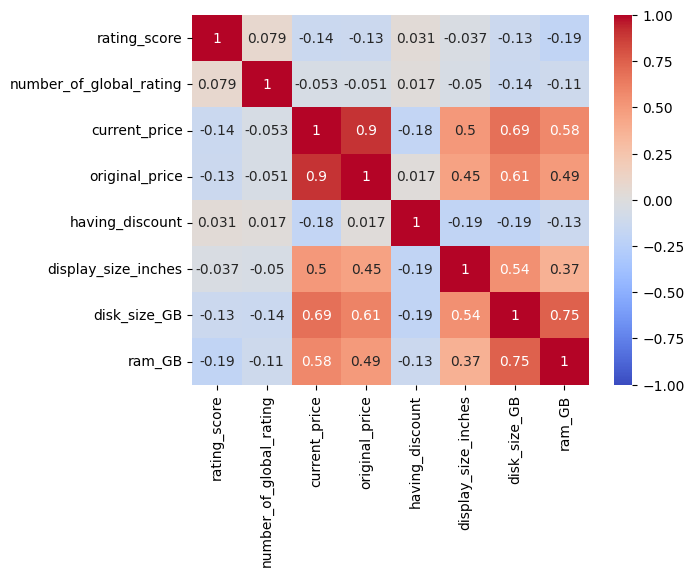

'\nCorrelation heatmap indicates that there is no linear relationship between rating score and the other variables\n'

In [148]:
# Correlation heatmap
sns.heatmap(amazon_laptop_df.corr(), annot=True, cmap="coolwarm" , vmin=-1, vmax=1)
plt.show()

'''
Correlation heatmap indicates that there is no linear relationship between rating score and the other variables
'''

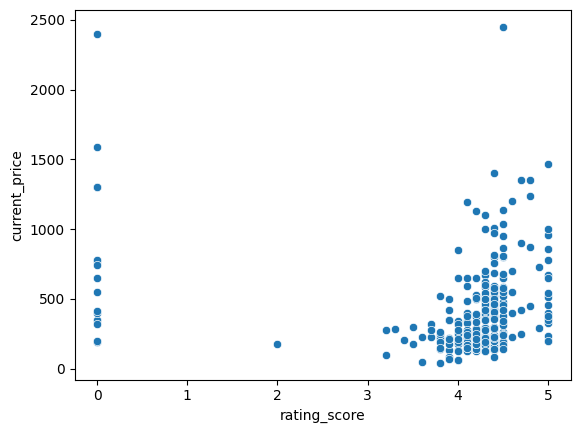

'\nI examined the Scatter plot of price versus rating score and made the following observations:\nTo begin with, rating scores of 0 are unreliable. Even though the Scatter plot indicates that some laptops \nhave a rating score of 0, it does not necessarily mean that they are all the worst-rated laptops. \nSome of them might have no orders yet, which is why I initially assigned a value of 0 to them. \n\nHowever, the majority of laptops with a price below $1500 tend to have higher ratings.\n'

In [149]:
# Price vs rating score
sns.scatterplot(data=amazon_laptop_df, x='rating_score', y='current_price')
plt.show()

'''
I examined the Scatter plot of price versus rating score and made the following observations:
To begin with, rating scores of 0 are unreliable. Even though the Scatter plot indicates that some laptops 
have a rating score of 0, it does not necessarily mean that they are all the worst-rated laptops. 
Some of them might have no orders yet, which is why I initially assigned a value of 0 to them. 

However, the majority of laptops with a price below $1500 tend to have higher ratings.
'''


Text(0.5, 1.0, 'Number of Orders by Brand')

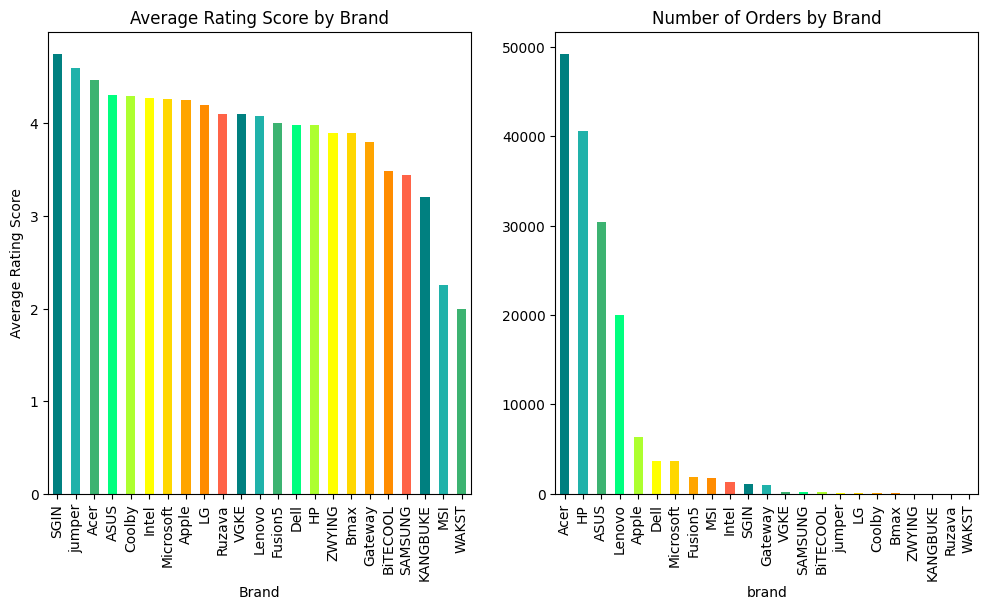

In [150]:
# Create a figure with two subplots side-by-side
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

# Plot the histogram of rating_score by brand on the first subplot
rating_mean_by_brand = amazon_laptop_df.groupby('brand')['rating_score'].mean()
rating_mean_by_brand.sort_values(ascending=False, inplace=True)
rating_mean_by_brand.plot(kind='bar', ax=ax[0], color=['#008080', '#20B2AA', '#3CB371', '#00FF7F', '#ADFF2F', '#FFFF00', '#FFD700', '#FFA500', '#FF8C00', '#FF6347'])
ax[0].set_title('Average Rating Score by Brand')
ax[0].set_xlabel('Brand')
ax[0].set_ylabel('Average Rating Score')

# Plot the histogram of number_of_global_rating by brand on the second subplot
num_global_rating_mean_by_brand = amazon_laptop_df.groupby('brand')['number_of_global_rating'].sum()
num_global_rating_mean_by_brand.sort_values(ascending=False, inplace=True)
num_global_rating_mean_by_brand.plot(kind='bar', ax=ax[1], color=['#008080', '#20B2AA', '#3CB371', '#00FF7F', '#ADFF2F', '#FFFF00', '#FFD700', '#FFA500', '#FF8C00', '#FF6347'])
ax[1].set_title('Number of Orders by Brand')





Text(0.5, 1.0, 'Number of Orders by Operating System')

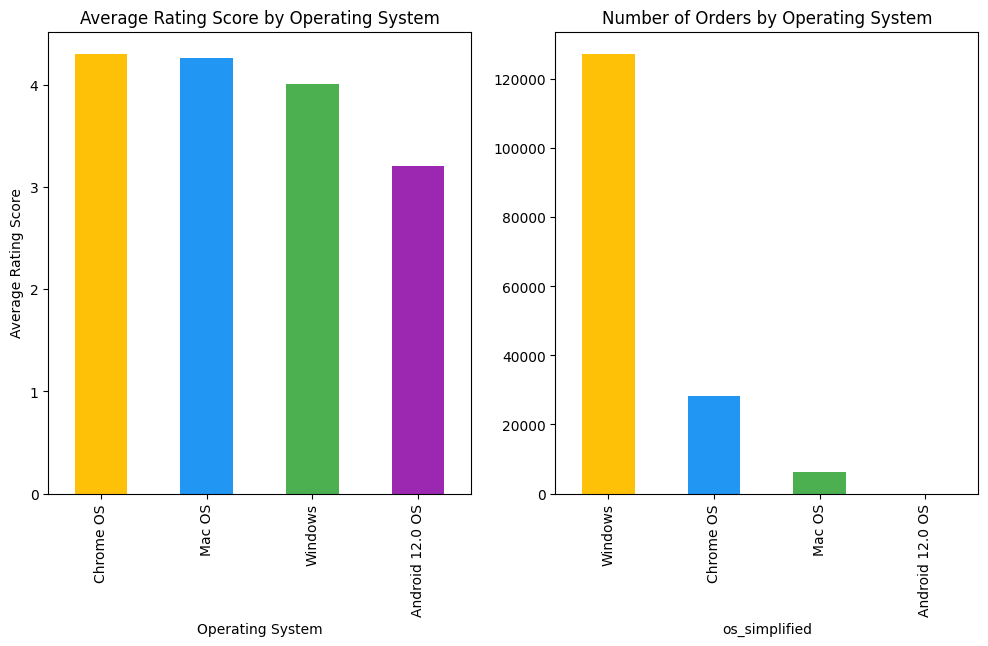

In [151]:
# Create a figure with two subplots side-by-side
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

# Plot the histogram of rating_score by operating system on the first subplot
rating_mean_by_os = amazon_laptop_df.groupby('os_simplified')['rating_score'].mean()
rating_mean_by_os.sort_values(ascending=False, inplace=True)
rating_mean_by_os.plot(kind='bar', ax=ax[0], color = ['#FFC107', '#2196F3', '#4CAF50', '#9C27B0'])
ax[0].set_title('Average Rating Score by Operating System')
ax[0].set_xlabel('Operating System')
ax[0].set_ylabel('Average Rating Score')

# Plot the histogram of number_of_global_rating by operating system on the second subplot
num_global_rating_mean_by_os = amazon_laptop_df.groupby('os_simplified')['number_of_global_rating'].sum()
num_global_rating_mean_by_os.sort_values(ascending=False, inplace=True)
num_global_rating_mean_by_os.plot(kind='bar', ax=ax[1], color = ['#FFC107', '#2196F3', '#4CAF50', '#9C27B0'])
ax[1].set_title('Number of Orders by Operating System')


In [152]:
amazon_laptop_df

rating_score  number_of_global_rating  current_price  original_price  \
0             4.3                      805         449.00          449.00   
1             4.3                      598         479.00          479.00   
2             3.9                      666         134.85          169.99   
3             4.4                       22         134.99          134.99   
4             4.5                     1125         259.99         1049.99   
..            ...                      ...            ...             ...   
410           5.0                        1         379.00          379.00   
412           4.1                       18        1196.99         1799.99   
413           3.8                        4         149.00          188.99   
414           4.3                      131         999.99          999.99   
415           3.4                       22         205.98          205.98   

       brand  having_discount  display_size_inches  disk_size_GB  ram_GB  \
0         HP                0                 14.0           512      16   
1         HP                0                 15.6          1024      16   
2    Gateway                1                 11.6            64       4   
3       ASUS                0                 15.6            32       4   
4       SGIN                1                 15.6           128       4   
..       ...              ...                  ...           ...     ...   
410       HP                0                 15.6           256       8   
412       LG                1                 14.0          1024      32   
413     ASUS                1                 11.6           256       4   
414     ASUS                0                 14.0          1024      16   
415       HP                0                 15.6            16       4   

    os_simplified  
0         Windows  
1         Windows  
2         Windows  
3       Chrome OS  
4         Windows  
..            ...  
410       Windows  
412       Windows  
413       Windows  
414       Windows  
415       Windows  

[261 rows x 10 columns]

In [153]:
'''
Create dummy variables
'''
# Create dummy variables for the "brand" feature
brand_dummies = pd.get_dummies(amazon_laptop_df['brand'], prefix='brand_dummies')

# Concatenate the original DataFrame with the brand dummy variables
amazon_laptop_df = pd.concat([amazon_laptop_df, brand_dummies], axis=1)

# Drop the original "brand" column from the DataFrame
amazon_laptop_df = amazon_laptop_df.drop('brand', axis=1)

# Create dummy variables for the "os_simplified" feature
os_dummies = pd.get_dummies(amazon_laptop_df['os_simplified'], prefix='os_dummies')

# Concatenate the original DataFrame with the os_simplified dummy variables
amazon_laptop_df = pd.concat([amazon_laptop_df, os_dummies], axis=1)

# Drop the original "os_simplified" column from the DataFrame
amazon_laptop_df = amazon_laptop_df.drop('os_simplified', axis=1)


In [154]:
'''
Linear model for predicting rating_score
'''
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split data into features (X) and target variable (y)
X = amazon_laptop_df.drop(['rating_score'], axis=1)
y = amazon_laptop_df['rating_score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


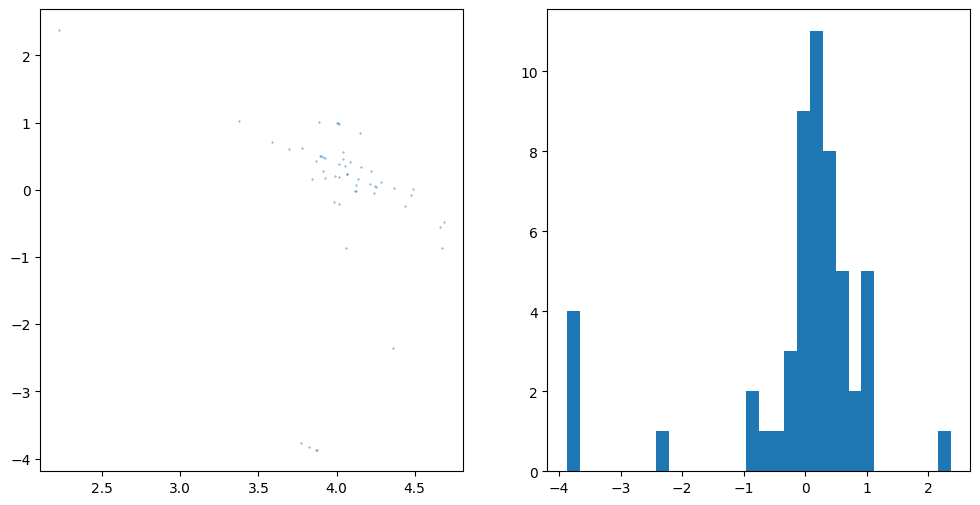

model      rmse        r2
0  linear-1  1.243443 -0.045737

In [155]:
# Linear Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.pyplot import scatter
from matplotlib.pyplot import hist


model_tracker= pd.DataFrame({"model":[], "rmse":[], "r2":[]})

def evaluate_model(model_name, y_test, y_pred):
    mse= mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test,y_pred)

    residuals = y_test- y_pred

    payload = [model_name, rmse, r2]
    model_tracker.loc[len(model_tracker.index)] = payload
    fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6))


    axes[0].scatter(y_pred, residuals,s=0.1)
    axes[1].hist(residuals[residuals<=150000], bins =30)
    plt.show()
    return model_tracker

# Create a linear regression model
linreg = LinearRegression()

# Train the model on the training data
linreg.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_pred = linreg.predict(X_test)

# Evaluate the model's performance on the testing data using mean squared error
evaluate_model("linear-1",  y_test, y_pred)

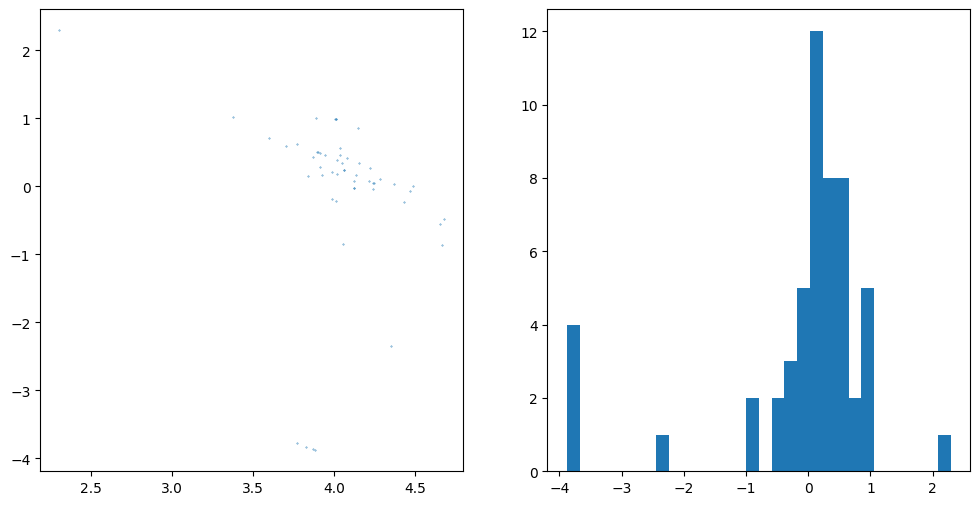

model      rmse        r2
0  linear-1  1.243443 -0.045737
1   ridge-1  1.240484 -0.040766

In [156]:
# Ridge model
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha = 0.1)
ridge_model = ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
evaluate_model("ridge-1",  y_test, y_pred)

In [157]:
# Using GridSearchCV to determine the best value for alpha
from sklearn.model_selection import GridSearchCV

ridge_grid = Ridge()
param_grid = {"alpha":[0.01,0.1,1,10,100]}
grid_search = GridSearchCV(ridge_grid, param_grid, cv=5) #5 is default for cv, bu we can also do cv like alpha
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

In [158]:
grid_search.best_params_

{'alpha': 0.1}

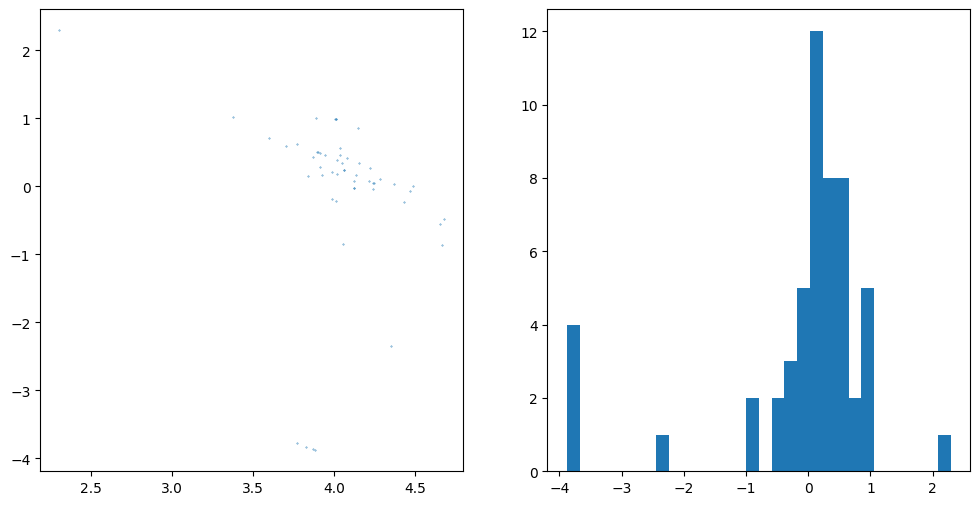

model      rmse        r2
0      linear-1  1.243443 -0.045737
1       ridge-1  1.240484 -0.040766
2  ridge-grid-1  1.240484 -0.040766

In [159]:
evaluate_model("ridge-grid-1",  y_test, y_pred)

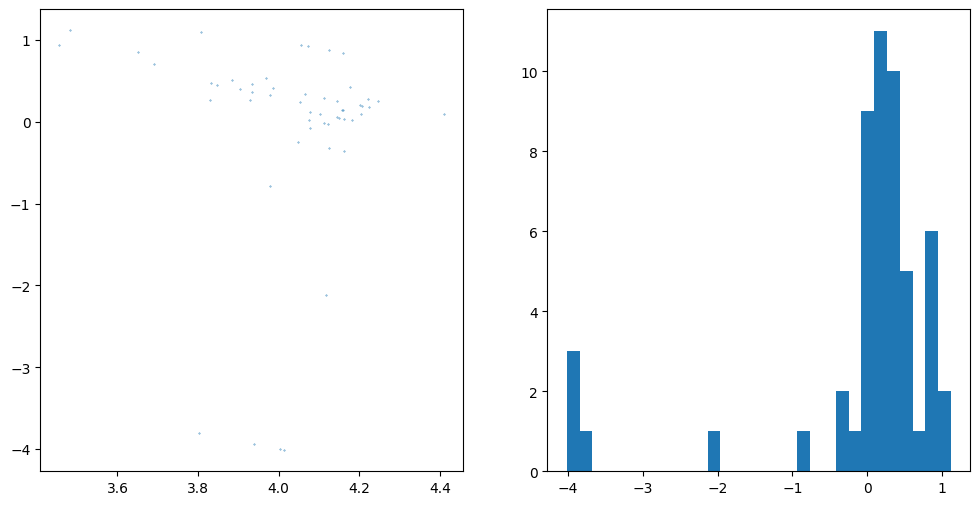

model      rmse        r2
0      linear-1  1.243443 -0.045737
1       ridge-1  1.240484 -0.040766
2  ridge-grid-1  1.240484 -0.040766
3       lasso-1  1.213266  0.004404

In [160]:
# Lasso model
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha = 0.1)
lasso_model = lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
evaluate_model("lasso-1",  y_test, y_pred)

In [161]:
# Using GridSearchCV to determine the best value for alpha
lasso_grid = Lasso()
param_grid = {"alpha":[0.01,0.1,1,10,100]}
grid_search = GridSearchCV(lasso_grid, param_grid, cv=5) #5 is default for cv, bu we can also do cv like alpha
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

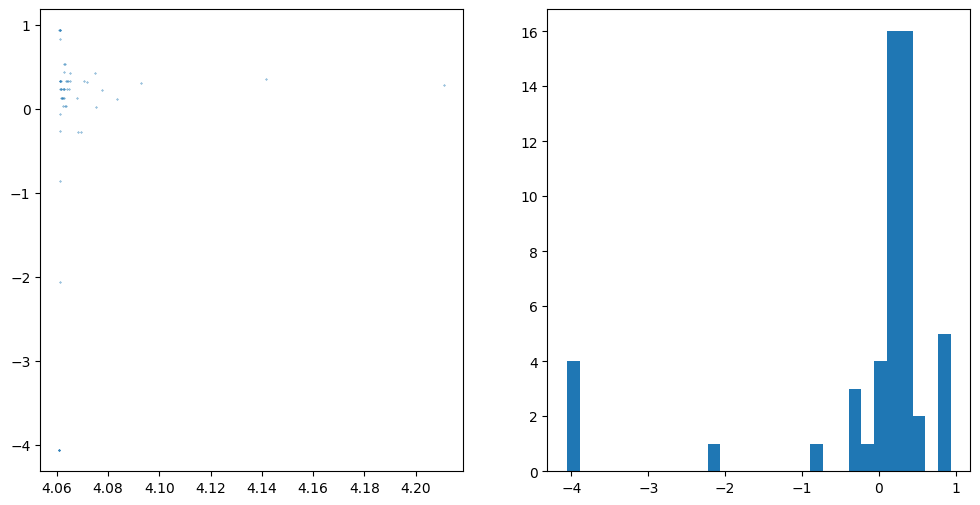

model      rmse        r2
0      linear-1  1.243443 -0.045737
1       ridge-1  1.240484 -0.040766
2  ridge-grid-1  1.240484 -0.040766
3       lasso-1  1.213266  0.004404
4  lasso-grid-1  1.217824 -0.003090

In [162]:
evaluate_model("lasso-grid-1",  y_test, y_pred)

In [163]:
'''
Based on the RMSE and R2 values, it seems that the lasso-1 model may be the best fit for your data, as it has the lowest RMSE value and the highest R2 value.

The R2 value measures the proportion of the variance in the dependent variable (in this case, the rating score) that can be explained by the independent variables (the other variables in the dataframe). 
An R2 value of -0.047 to 0.004 indicates that the independent variables are not doing a good job of explaining the variation in the dependent variable. 
I think this could be due to the fact that the relationship between the dependent and independent variables may be more complex than a linear model can capture.
'''

'\nBased on the RMSE and R2 values, it seems that the lasso-1 model may be the best fit for your data, as it has the lowest RMSE value and the highest R2 value.\n\nThe R2 value measures the proportion of the variance in the dependent variable (in this case, the rating score) that can be explained by the independent variables (the other variables in the dataframe). \nAn R2 value of -0.047 to 0.004 indicates that the independent variables are not doing a good job of explaining the variation in the dependent variable. \nI think this could be due to the fact that the relationship between the dependent and independent variables may be more complex than a linear model can capture.\n'

In [164]:
'''
Linear model for predicting number of orders
'''
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split data into features (X) and target variable (y)
X = amazon_laptop_df.drop(['number_of_global_rating'], axis=1)
y = amazon_laptop_df['number_of_global_rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

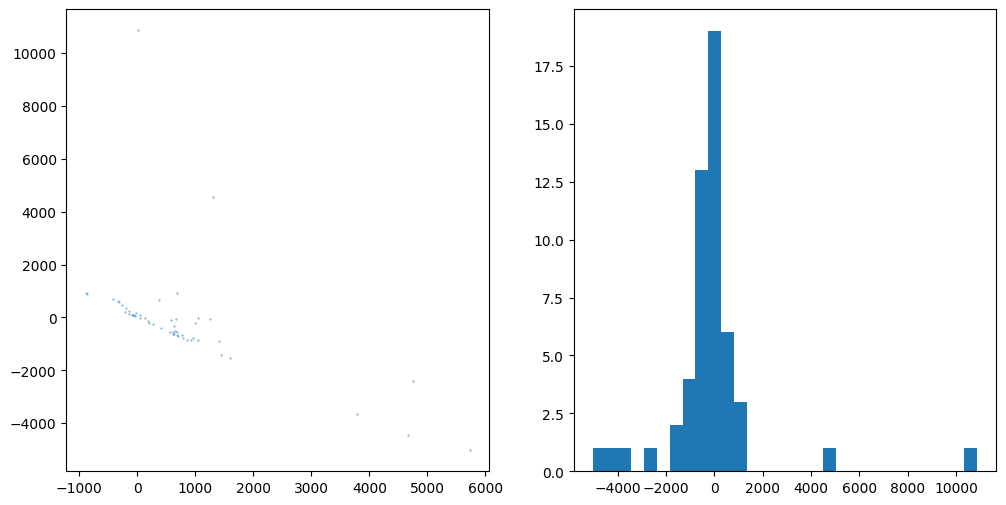

model         rmse        r2
0  linear-1  2038.020475 -0.475752

In [165]:
model_tracker= pd.DataFrame({"model":[], "rmse":[], "r2":[]})

# Create a linear regression model
linreg = LinearRegression()

# Train the model on the training data
linreg.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_pred = linreg.predict(X_test)

# Evaluate the model's performance on the testing data using mean squared error
evaluate_model("linear-1",  y_test, y_pred)

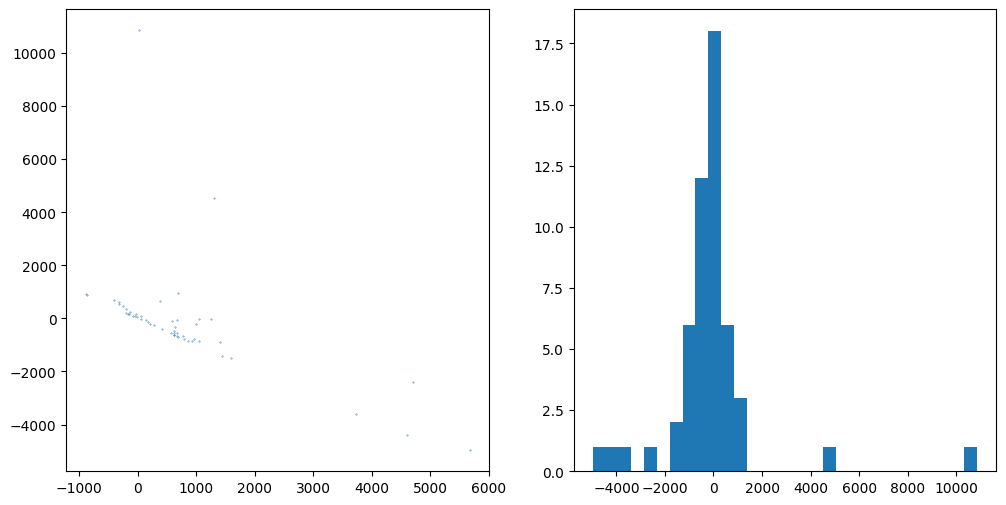

model         rmse        r2
0  linear-1  2038.020475 -0.475752
1   ridge-1  2028.545284 -0.462061

In [166]:
# Ridge model
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha = 0.1)
ridge_model = ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
evaluate_model("ridge-1",  y_test, y_pred)

In [167]:
# Using GridSearchCV to determine the best value for alpha
from sklearn.model_selection import GridSearchCV

ridge_grid = Ridge()
param_grid = {"alpha":[0.01,0.1,1,10,100]}
grid_search = GridSearchCV(ridge_grid, param_grid, cv=5) #5 is default for cv, bu we can also do cv like alpha
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

In [168]:
grid_search.best_params_

{'alpha': 100}

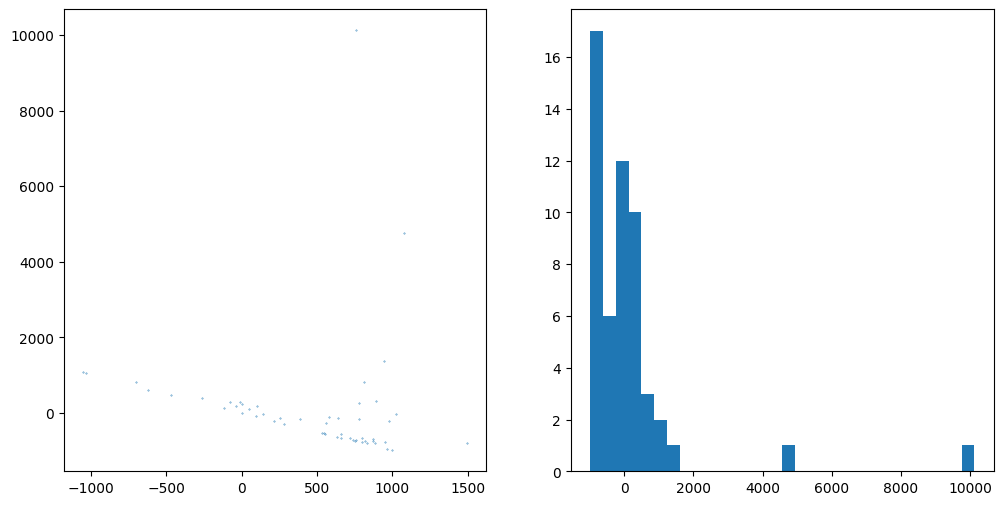

model         rmse        r2
0      linear-1  2038.020475 -0.475752
1       ridge-1  2028.545284 -0.462061
2  ridge-grid-1  1644.106258  0.039592

In [169]:
evaluate_model("ridge-grid-1",  y_test, y_pred)

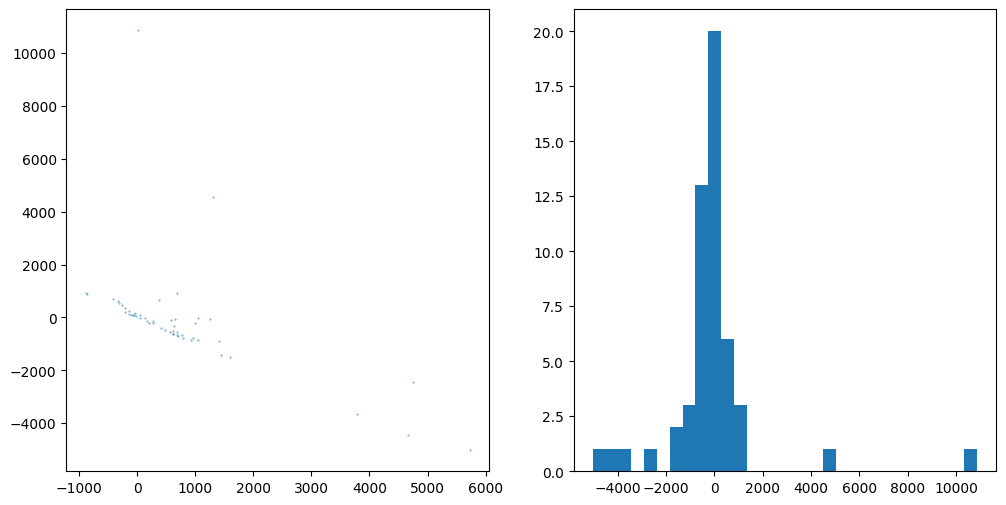

model         rmse        r2
0      linear-1  2038.020475 -0.475752
1       ridge-1  2028.545284 -0.462061
2  ridge-grid-1  1644.106258  0.039592
3       lasso-1  2033.940051 -0.469848

In [170]:
# Lasso model
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha = 0.1)
lasso_model = lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
evaluate_model("lasso-1",  y_test, y_pred)

In [171]:
# Using GridSearchCV to determine the best value for alpha
lasso_grid = Lasso()
param_grid = {"alpha":[0.01,0.1,1,10,100]}
grid_search = GridSearchCV(lasso_grid, param_grid, cv=5) #5 is default for cv, bu we can also do cv like alpha
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

C:\Users\yq89_\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.831e+08, tolerance: 1.380e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\yq89_\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.263e+08, tolerance: 1.408e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\yq89_\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

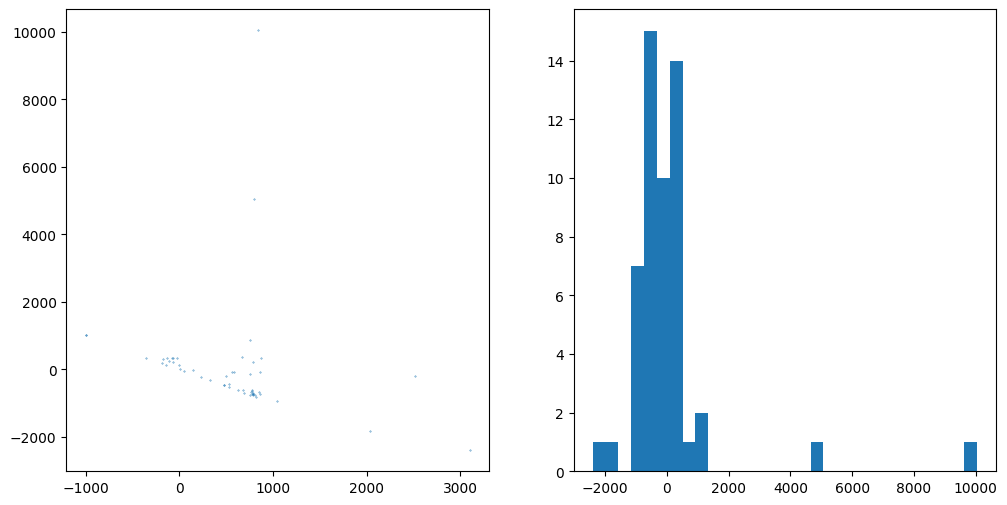

model         rmse        r2
0      linear-1  2038.020475 -0.475752
1       ridge-1  2028.545284 -0.462061
2  ridge-grid-1  1644.106258  0.039592
3       lasso-1  2033.940051 -0.469848
4  lasso-grid-1  1679.740532 -0.002491

In [172]:
evaluate_model("lasso-grid-1",  y_test, y_pred)

In [173]:
'''
My insight:

Based on the RMSE and R2 values, the ridge-grid-1 model seems to be the best model with the lowest RMSE and highest R2 value. 
The other models seem to perform similarly with relatively high RMSE values and negative R2 values.

However, a negative R2 value indicates that the model is performing worse than the baseline model which simply predicts the mean value of the target variable. 
I think this may suggest that the models may not be appropriate for predicting the number of orders.
'''

'\nMy insight:\n\nBased on the RMSE and R2 values, the ridge-grid-1 model seems to be the best model with the lowest RMSE and highest R2 value. \nThe other models seem to perform similarly with relatively high RMSE values and negative R2 values.\n\nHowever, a negative R2 value indicates that the model is performing worse than the baseline model which simply predicts the mean value of the target variable. \nI think this may suggest that the models may not be appropriate for predicting the number of orders.\n'

In [174]:
'''
neural network models

I will use a Multi-Layer Perceptron (MLP) to predict the price of a laptop. 
MLP is a type of artificial neural network (ANN) that consists of at least three layers of nodes: an input layer, 
one or more hidden layers, and an output layer. MLPs are commonly used for supervised learning problems such as classification and regression.
representations that will ultimately lead to a good prediction.
'''
# Multi-Layer Perceptron (MLP)

from keras.models import Sequential
from keras.layers import Dense

X = amazon_laptop_df.drop(['current_price'], axis=1)
y = amazon_laptop_df['current_price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the model
mlp_model = Sequential()
mlp_model.add(Dense(10, input_dim=X.shape[1], activation='relu'))
mlp_model.add(Dense(1, activation='linear'))

# compile the model
mlp_model.compile(loss='mse', optimizer='adam')

# fit the model
mlp_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
7/7 [==============================] - 0s 14ms/step - loss: 795948.7500 - val_loss: 618210.2500
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 712897.2500 - val_loss: 560987.6875
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 663864.3750 - val_loss: 501585.6250
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 581948.0625 - val_loss: 447905.7500
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 532337.3125 - val_loss: 392630.8750
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 446617.1250 - val_loss: 344145.8750
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 381632.6562 - val_loss: 301840.7500
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 332233.2812 - val_loss: 259870.8281
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 285005.2812 - val_loss: 220468.5625
Epoch 10/100
7/7 [==================

7/7 [==============================] - 0s 4ms/step - loss: 16592.3242 - val_loss: 25592.0234
Epoch 79/100
7/7 [==============================] - 0s 4ms/step - loss: 16587.3613 - val_loss: 25604.3086
Epoch 80/100
7/7 [==============================] - 0s 4ms/step - loss: 16543.4297 - val_loss: 25614.0684
Epoch 81/100
7/7 [==============================] - 0s 4ms/step - loss: 16531.6660 - val_loss: 25616.8027
Epoch 82/100
7/7 [==============================] - 0s 4ms/step - loss: 16538.5605 - val_loss: 25631.0703
Epoch 83/100
7/7 [==============================] - 0s 4ms/step - loss: 16504.5508 - val_loss: 25642.6973
Epoch 84/100
7/7 [==============================] - 0s 4ms/step - loss: 16517.0410 - val_loss: 25652.7090
Epoch 85/100
7/7 [==============================] - 0s 4ms/step - loss: 16491.6504 - val_loss: 25664.6328
Epoch 86/100
7/7 [==============================] - 0s 4ms/step - loss: 16473.4160 - val_loss: 25667.7695
Epoch 87/100
7/7 [==============================] - 0s 4ms/

In [175]:
'''
Based on the output, the model's training loss is decreasing and the validation loss is also decreasing. 
This indicates that the model is learning and generalizing well to unseen data. 
However, the loss values are quite large, indicating that the model might not be the best fit for this data or could benefit from additional tuning.
'''

"\nBased on the output, the model's training loss is decreasing and the validation loss is also decreasing. \nThis indicates that the model is learning and generalizing well to unseen data. \nHowever, the loss values are quite large, indicating that the model might not be the best fit for this data or could benefit from additional tuning.\n"